<a href="https://colab.research.google.com/github/DevilsWolf/Basic-scripting/blob/master/Power%20System%20Intrusion%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# ==============================================================================
# Step 0: Setup and Import Libraries
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set plotting style for better visualization
sns.set_style('whitegrid')
print("Libraries imported successfully.")

Libraries imported successfully.


In [7]:
# ==============================================================================
# Step 1: Mount Google Drive and Load Data
# ==============================================================================
# This command will prompt you to authorize Colab to access your Google Drive.
drive.mount('/content/drive')

# Define the file paths based on your screenshot
# The path starts with '/content/drive/MyDrive/'
train_path = '/content/drive/MyDrive/Colab_Data/Train.csv'
test_path = '/content/drive/MyDrive/Colab_Data/Test.csv'

# Load the datasets from your Google Drive
try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print("\nSuccessfully loaded Train.csv and Test.csv from Google Drive.")
except FileNotFoundError:
    print("\nERROR: Files not found. Please check the following:")
    print("1. Your folder is named exactly 'Colab_Data' and is directly inside 'My Drive'.")
    print("2. The files are named exactly 'Train.csv' and 'Test.csv' (case-sensitive).")
    # Stop execution if files aren't found
    exit()

print("\nTraining Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)
print("\nFirst 5 rows of training data:")
print(train_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Successfully loaded Train.csv and Test.csv from Google Drive.

Training Data Shape: (1094, 54)
Testing Data Shape: (1094, 54)

First 5 rows of training data:
    time  sqNum  stnum  state_cb  sqDiff  stDiff  timeLastMsg  recentChange  \
0   4319      1      2         1      -3       1          319             1   
1   6394      1      4         1      -1       1           75             1   
2   7965      1      6         1       0       1          570             1   
3  27258      1      7         1     -19       1          293             1   
4  29376      1      8         1      -1       1          118             1   

   MU1Cs  MU2Cs  ...  MU4VoltageAngleA  MU4VoltageAngleB  MU4VoltageAngleC  \
0      0      0  ...            138.78             18.79           -101.19   
1      0      0  ...           -176.72             63.30            -56.69   
2  


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  1094 non-null   int64  
 1   sqNum                 1094 non-null   int64  
 2   stnum                 1094 non-null   int64  
 3   state_cb              1094 non-null   int64  
 4   sqDiff                1094 non-null   int64  
 5   stDiff                1094 non-null   int64  
 6   timeLastMsg           1094 non-null   int64  
 7   recentChange          1094 non-null   int64  
 8   MU1Cs                 1094 non-null   int64  
 9   MU2Cs                 1094 non-null   int64  
 10  MU3Cs                 1094 non-null   int64  
 11  MU4Cs                 1094 non-null   int64  
 12  Cs                    1094 non-null   int64  
 13  consistency           1094 non-null   int64  
 14  threePhaseVSum        1094 non-null   float64
 15  th

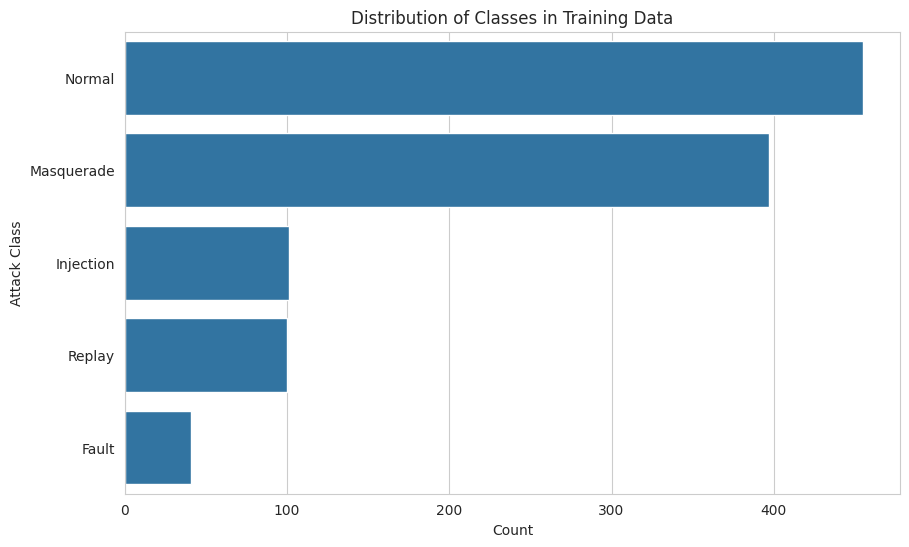


Class distribution in training data:
class
Normal        455
Masquerade    397
Injection     101
Replay        100
Fault          41
Name: count, dtype: int64


In [8]:
# ==============================================================================
# Step 2: Exploratory Data Analysis (EDA)
# ==============================================================================
print("\nData Information:")
train_df.info()

# Analyze the distribution of the target variable 'class'
plt.figure(figsize=(10, 6))
sns.countplot(y=train_df['class'], order=train_df['class'].value_counts().index)
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Count')
plt.ylabel('Attack Class')
plt.show()

print("\nClass distribution in training data:")
print(train_df['class'].value_counts())

In [9]:

# ==============================================================================
# Step 3: Data Preprocessing
# ==============================================================================
# Separate features (X) and target (y)
X_train = train_df.drop('class', axis=1)
y_train_labels = train_df['class']

X_test = test_df.drop('class', axis=1)
y_test_labels = test_df['class']

# Encode the categorical target variable 'class' into numerical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_labels)
y_test = label_encoder.transform(y_test_labels)

# Store the mapping from encoded numbers to original class names
class_names = label_encoder.classes_
print(f"\nTarget classes mapped to numbers: {list(zip(class_names, range(len(class_names))))}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData has been preprocessed: Features are scaled and labels are encoded.")


Target classes mapped to numbers: [('Fault', 0), ('Injection', 1), ('Masquerade', 2), ('Normal', 3), ('Replay', 4)]

Data has been preprocessed: Features are scaled and labels are encoded.


In [10]:
# ==============================================================================
# Step 4: Model Training and Evaluation
# ==============================================================================
# --- Model 1: Logistic Regression ---
print("\n--- Training Logistic Regression Model ---")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=class_names))

# --- Model 2: Random Forest Classifier ---
print("\n--- Training Random Forest Model ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=class_names))

# --- Model 3: XGBoost Classifier ---
print("\n--- Training XGBoost Model ---")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=class_names))


--- Training Logistic Regression Model ---
Logistic Regression Accuracy: 0.8528336380255942

Classification Report:
               precision    recall  f1-score   support

       Fault       0.98      1.00      0.99        41
   Injection       0.61      0.28      0.38       101
  Masquerade       0.87      0.99      0.92       397
      Normal       0.87      1.00      0.93       455
      Replay       0.59      0.16      0.25       100

    accuracy                           0.85      1094
   macro avg       0.78      0.69      0.69      1094
weighted avg       0.82      0.85      0.82      1094


--- Training Random Forest Model ---
Random Forest Accuracy: 0.9890310786106032

Classification Report:
               precision    recall  f1-score   support

       Fault       1.00      1.00      1.00        41
   Injection       1.00      0.99      1.00       101
  Masquerade       0.98      1.00      0.99       397
      Normal       0.99      1.00      0.99       455
      Replay    

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:53:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9890310786106032

Classification Report:
               precision    recall  f1-score   support

       Fault       1.00      1.00      1.00        41
   Injection       1.00      1.00      1.00       101
  Masquerade       0.99      1.00      0.99       397
      Normal       0.98      1.00      0.99       455
      Replay       1.00      0.89      0.94       100

    accuracy                           0.99      1094
   macro avg       0.99      0.98      0.99      1094
weighted avg       0.99      0.99      0.99      1094




--- Analyzing Feature Importance (from XGBoost) ---


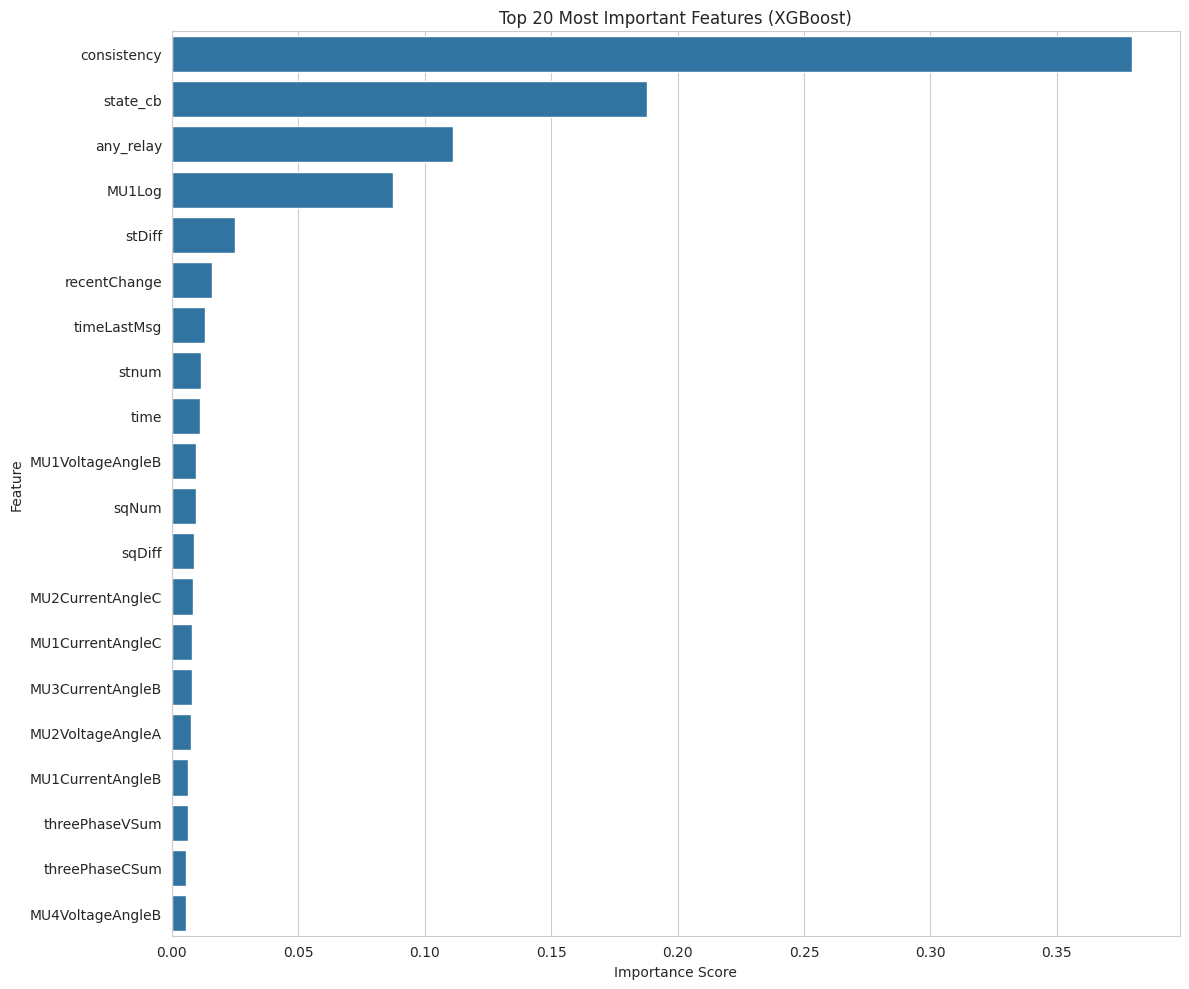


Top 10 most important features:
             feature  importance
13       consistency    0.379734
3           state_cb    0.188012
52         any_relay    0.111240
24            MU1Log    0.087504
5             stDiff    0.025168
7       recentChange    0.015989
6        timeLastMsg    0.013058
2              stnum    0.011614
0               time    0.011181
18  MU1VoltageAngleB    0.009597


In [11]:
# ==============================================================================
# Step 5: Feature Importance Analysis (using XGBoost)
# ==============================================================================
print("\n--- Analyzing Feature Importance (from XGBoost) ---")
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTop 10 most important features:")
print(feature_importance_df.head(10))


In [12]:
# ==============================================================================
# Step 6: Final Comparison and Conclusion
# ==============================================================================
print("\n--- Final Model Comparison ---")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


--- Final Model Comparison ---
Logistic Regression Accuracy: 0.8528
Random Forest Accuracy: 0.9890
XGBoost Accuracy: 0.9890
